# GP Jax Code

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from math import pi
from matplotlib import pyplot as plt
from gp_oed_surrogate import create_gp

# Set random seed:
np.random.seed(1)

In [2]:
# Function to predict:
def f(x):
    return x * jnp.sin(x)

In [3]:
# Kernel used by GP:
def kernel(x_1, x_2, params):
    val = params["const"]*jnp.exp(-0.5*((x_2 - x_1)/params["length"])**2)
    return val

In [4]:
# Helper function to plot training data and GP predictions:
def plot_gp(x_pred, y_pred, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean, var = y_pred['mean'].squeeze(), y_pred['var'].squeeze()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

The noiseless case:

In [5]:
# Create noiseless dataset:
x_train = jnp.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y_train = (f(x_train).ravel())
y_train = y_train.reshape(len(y_train),1)

# Train Gaussian Process model:
constraints = {"const": {">": 10**-2, "<": 10**2}, 
               "length": {">": 10**-1, "<": 10**1}}
surrogate = create_gp(kernel, x_train, y_train, constraints)

43427.8
19.88155
19.881533
19.881474
19.881233
19.880266
19.876404
19.860897
19.797651
19.022947
42.812798
16.621498
15.549626
15.525151
15.258962
15.105948
5923.4697
14.717256
14.597819
14.586017
5684.29
14.549079
14.531229
14.53128
14.523387
14.523303
14.523269
14.523274
14.523261
14.523266
14.523261
14.523261
14.52329
14.523261
14.523261
14.523259
14.523271
14.523291
14.523259
14.523259
14.523266
14.523259
14.523259
14.52329
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
      fun: array(14.52325916)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.63763762e-05, -2.37464905e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 56
      nit: 10
     njev: 56
   status: 0
  success: True
        x: array([22.18749931,  1.67579892])
139274.81
19.88155
15.74871
109.12827
109.139015
109.19044
109.25013
109.12827
109.12827
109.12827
109.12827
109.12827
109.12827
109

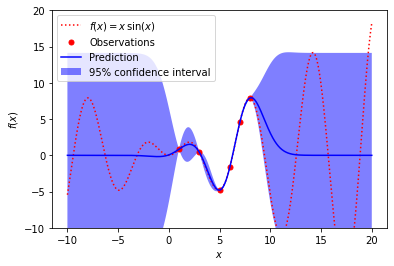

In [6]:
# Plot predictions of GP model:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_pred = surrogate.predict(x_pred)
plot_gp(x_pred, y_pred, f, x_train, y_train)

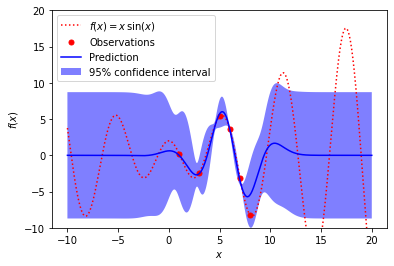

In [7]:
grad_order = 2

# Get correct solution:
grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()

# Use GP:
grad = ({'idx': [0], 'order':grad_order}, )
# grad = ({'idx': [0], 'order':1}, {'idx': [0], 'order':1})
y_pred = surrogate.predict(x_pred, grad=grad)

plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

The noisy case:

In [10]:
# Create noisy dataset:
x_train = jnp.linspace(0.1, 9.9, 20)
x_train = jnp.atleast_2d(x_train).T
y_train = f(x_train).ravel()
noise = np.random.normal(loc=0, scale=0.5, size=y_train.size)
y_train += noise
# Train Gaussian Process model:
constraints = {"const": {">": 10**-2, "<": 10**2}, 
               "length": {">": 10**-1, "<": 10**1}, 
               "noise": {">":10**-1, "<":10**1}} 
surrogate = create_gp(kernel, x_train, y_train, constraints)
# Plot predictions of GP model:
x_pred = jnp.atleast_2d(jnp.linspace(0, 10, 1000)).T
y_pred = surrogate.predict(x_pred)

59.855957
57.88459
56.32908
55.43277
55.53218
55.528336
55.39643
52.599716
50.660843
50.333267
50.322464
64.84903
50.455032
50.31511
49.808624
45.881874
39.28058
35.176365
28.346222
28.311752
28.144651
27.432583
1203.661
27.284569
27.206993
27.68717
27.194077
27.16595
27.163937
27.163967
27.163961
27.163864
27.163864
27.163929
27.163864
27.163864
27.163925
27.163864
27.163864
27.163994
27.163864
27.163864
27.163757
27.163757
27.163757
27.164082
27.163757
27.163757
27.164024
27.16399
27.16391
27.164013
27.163876
27.163948
27.163952
27.163876
27.163973
27.163906
27.163948
27.163876
27.163876
27.16394
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
27.163876
      fun: array(27.16387558)
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.09796834e-04, -3.42350006e-02,  1.75900269e+01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 74
      nit: 18
     njev: 74
   status: 0
  

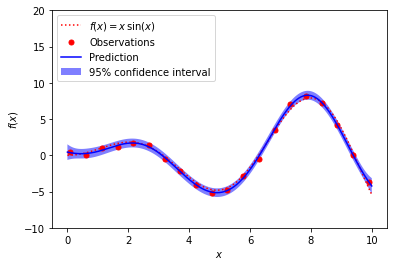

In [11]:
# Plot fitted GP:
plot_gp(x_pred, y_pred, f, x_train, y_train)

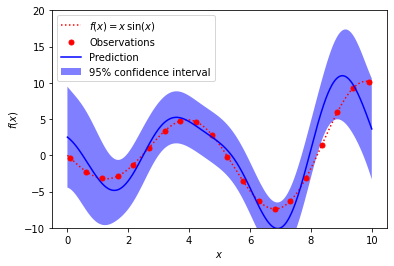

In [13]:
grad_order = 3

# Get correct solution:
grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()

# Use GP:
grad = ({'idx': [0], 'order':grad_order}, )
y_pred = surrogate.predict(x_pred, grad=grad)

plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

# Comparison with GP Tools

In [ ]:
!pip install gptools

In [18]:
def plot_gptools(x_pred, mean, var, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

In [23]:
import gptools

# Noiseless case:

x_train = jnp.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y_train = (f(x_train).ravel())
y_train = y_train.reshape(len(y_train),1)

gp = gptools.GaussianProcess(gptools.SquaredExponentialKernel(param_bounds=[(0, 20), (0, 5)]))
gp.add_data(x_train, y_train.squeeze(), n=0)
gp.optimize_hyperparameters(verbose=True)

/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat


Got 12 completed starts, optimal result is:
     fun: 55.969803605077836
     jac: array([ 6.96182251e-05, -3.61442566e-03])
 message: 'Optimization terminated successfully'
    nfev: 58
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([4.71090633, 1.67587954])

LL	-56
sigma_f	4.71
l_1	1.68


(     fun: 55.969803605077836
      jac: array([ 6.96182251e-05, -3.61442566e-03])
  message: 'Optimization terminated successfully'
     nfev: 58
      nit: 16
     njev: 16
   status: 0
  success: True
        x: array([4.71090633, 1.67587954]),
 12)

In [ ]:
grad_order = 10

grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()
print('a')
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_star, err_y_star = gp.predict(x_pred, n=grad_order)
plot_gptools(x_pred, y_star, err_y_star**2, grad_f, x_train, y_true)